# Pythonによる実践統計分析 第4回ハンズオン資料

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Excelデータの読み込み
- 読み込むファイルをipynbファイルと同じフォルダに保存する。
- pd.read_excel(ファイル名)

In [4]:
data = pd.read_excel("sample_data_real_estate.xlsx")
data.head()

,#,住宅価格,坪単価,坪数,建蔽率,建物単価,施主年齢,施主生年,販売会社,都道府県
0,1,47400000,563000,44.69,0.834,482000,30,1986,中央住宅,東京都
1,2,60300000,694000,41.74,0.759,518000,36,1980,ダイワハウス,東京都
2,3,53700000,744000,42.89,0.955,384000,38,1978,ダイワハウス,東京都
3,4,29300000,613000,37.87,0.892,440000,42,1974,その他,埼玉県
4,5,56200000,717000,38.87,1.005,504000,39,1977,ダイワハウス,東京都


In [5]:
# いらないカラムを削除する
data = data.drop(["#"], axis=1)
data.head()

,住宅価格,坪単価,坪数,建蔽率,建物単価,施主年齢,施主生年,販売会社,都道府県
0,47400000,563000,44.69,0.834,482000,30,1986,中央住宅,東京都
1,60300000,694000,41.74,0.759,518000,36,1980,ダイワハウス,東京都
2,53700000,744000,42.89,0.955,384000,38,1978,ダイワハウス,東京都
3,29300000,613000,37.87,0.892,440000,42,1974,その他,埼玉県
4,56200000,717000,38.87,1.005,504000,39,1977,ダイワハウス,東京都


## 散布図行列
- 散布図は量的変数には使えるが、質的変数には使えない。
- 散布図行列を作るには、質的変数を抜いて作業する。

In [8]:
data2 = data[["住宅価格", "坪単価", "坪数", "建蔽率", "建物単価", "施主年齢", "施主生年"]]

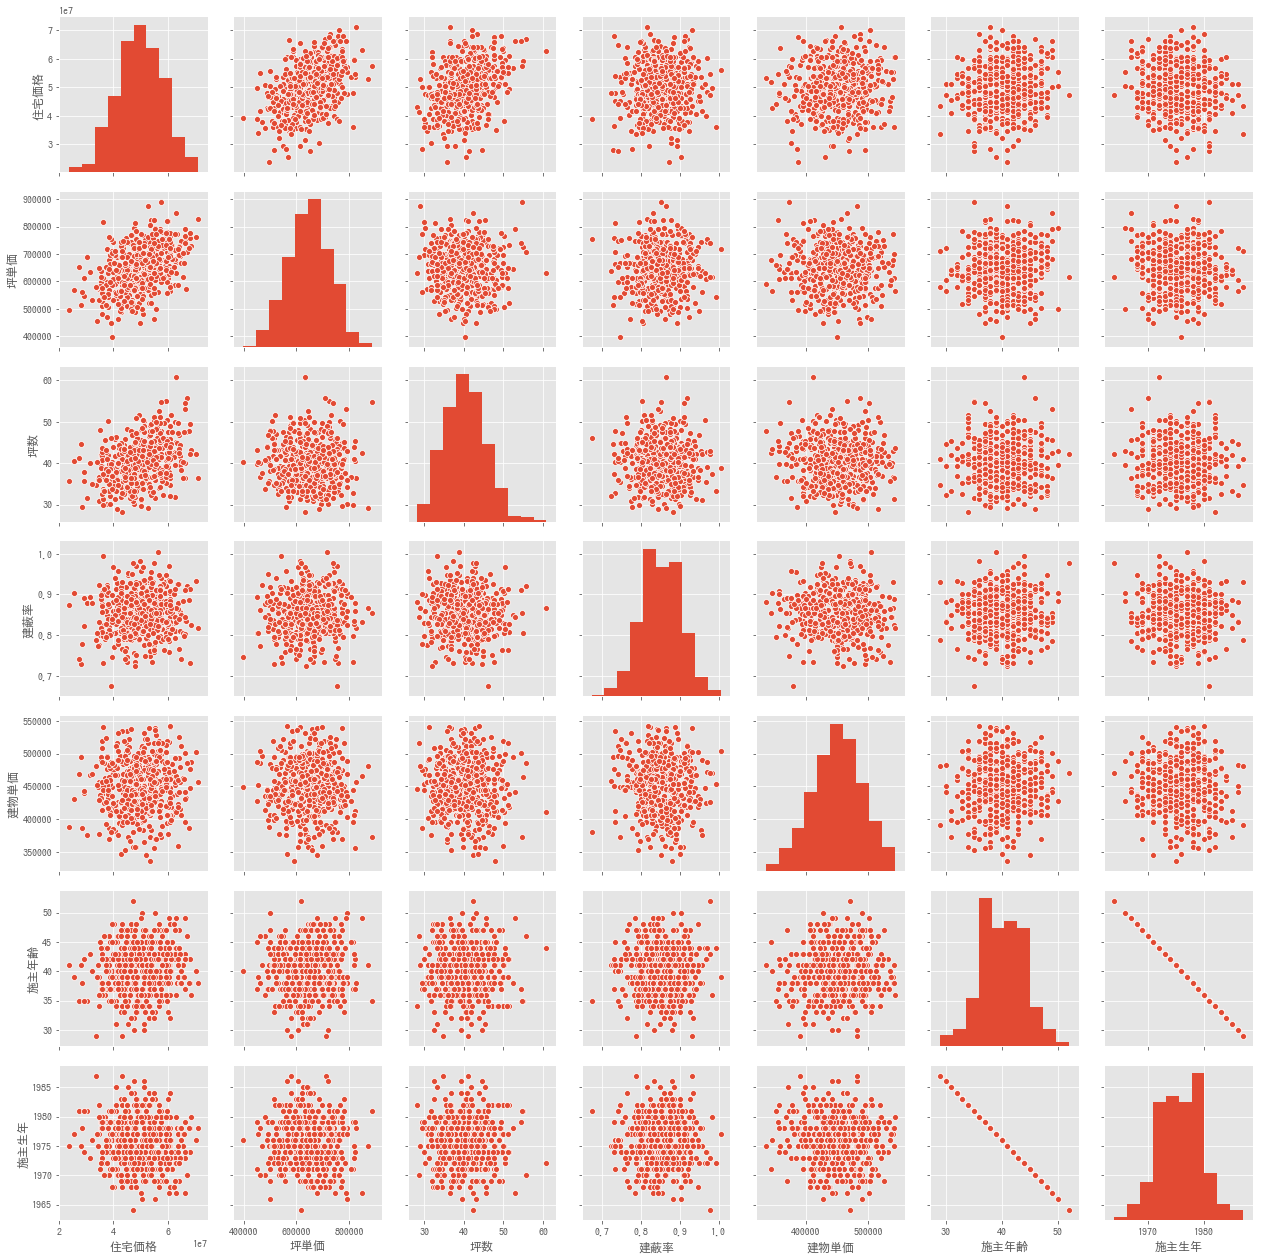

In [9]:
sns.pairplot(data2)

## 相関係数行列

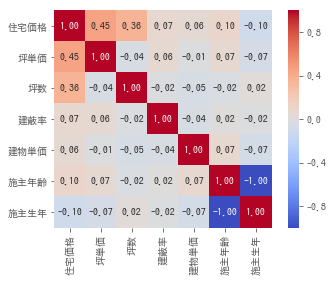

In [10]:
sns.heatmap(data2.corr(), 
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 10},
            yticklabels=data2.columns,
            xticklabels=data2.columns,
            cmap="coolwarm")

## 回帰分析

In [11]:
from sklearn.linear_model import LinearRegression

### 単回帰分析

In [16]:
X = data2[["坪単価"]]
y = data2["住宅価格"]

In [17]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
print("決定係数: {:.3f}".format(linreg.score(X, y)))
print("\n回帰係数\n{}".format(pd.Series(linreg.coef_, index=X.columns)))
print("切片: {:.3f}".format(linreg.intercept_))

決定係数: 0.205

回帰係数
坪単価    47.449459
dtype: float64
切片: 18970784.528


/Users/takumi/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


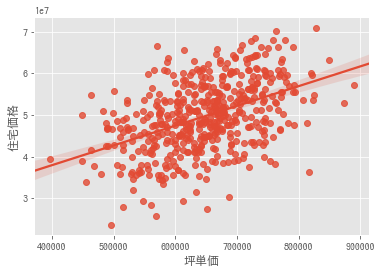

In [28]:
sns.regplot(x="坪単価", y="住宅価格", data=data2)

### 仮説検定結果を含めた回帰分析

In [30]:
import statsmodels.api as sm

In [41]:
X = data[["坪単価"]]
y = data["住宅価格"]

In [42]:
mod = sm.OLS(y, sm.add_constant(X))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   住宅価格   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 27 Mar 2019   Prob (F-statistic):           1.33e-26
Time:                        12:25:56   Log-Likelihood:                -8625.1
No. Observations:                 500   AIC:                         1.725e+04
Df Residuals:                     498   BIC:                         1.726e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.897e+07   2.73e+06      6.937      0.0

### 重回帰分析

In [35]:
X = data2.drop("住宅価格", axis=1)
y = data2["住宅価格"]

In [40]:
mod = sm.OLS(y, sm.add_constant(X))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   住宅価格   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     57.07
Date:                Wed, 27 Mar 2019   Prob (F-statistic):           8.10e-47
Time:                        12:24:56   Log-Likelihood:                -8568.4
No. Observations:                 500   AIC:                         1.715e+04
Df Residuals:                     494   BIC:                         1.717e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.4768     36.517      1.629      0.104     -12.272     131.225
坪単価           48.4069      3.776     12.819      0.000      40.988      55.826
坪数          6.368e+05   5.86e+04     10.876      0.000    5.22e+05    7.52e+05
建蔽率         8.469e+06   5.96e+06      1.421      0.156   -3.24e+06    2.02e+07
建物単価          16.6749      7.654      2.179      0.030       1.636      31.713
施主年齢        1.338e+05   7.46e+04      1.793      0.074   -1.28e+04     2.8e+05
施主生年       -1.391e+04   3778.357     -3.682      0.000   -2.13e+04   -6489.670
==============================================================================
Omnibus:                        0.841   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.651
Skew:                          -0.056   Prob(JB):                        0.722
Kurtosis:                       3.137   Cond. No.                     2.93e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### モデル改善(1)
- p値の値が高い建蔽率を外す
- 施主生年と施主年齢は逆相関なので、一方を外す

In [45]:
X = data2.drop(["住宅価格", "建蔽率", "施主生年"], axis=1)
y = data2["住宅価格"]

In [46]:
mod = sm.OLS(y, sm.add_constant(X))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   住宅価格   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     70.69
Date:                Wed, 27 Mar 2019   Prob (F-statistic):           2.44e-47
Time:                        12:48:16   Log-Likelihood:                -8569.4
No. Observations:                 500   AIC:                         1.715e+04
Df Residuals:                     495   BIC:                         1.717e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.082e+07   5.67e+06     -3.670      0.000    -3.2e+07   -9.67e+06
坪単価           48.7298      3.773     12.915      0.000      41.317      56.143
坪数          6.353e+05   5.86e+04     10.841      0.000     5.2e+05     7.5e+05
建物単価          16.1889      7.654      2.115      0.035       1.150      31.228
施主年齢        1.492e+05   7.59e+04      1.966      0.050      65.559    2.98e+05
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                1.289
Skew:                          -0.100   Prob(JB):                        0.525
Kurtosis:                       3.149   Cond. No.                     1.49e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### モデル改善(2)
- 質的変数を回帰分析に入れる
- 都道府県をダミー変数化

In [50]:
def is_tokyo(x):
    
    if x == "東京都":
        return 1
    else:
        return 0

In [51]:
data3 = data
data3["東京都"] = data3["都道府県"].apply(is_tokyo)
data3.head()

,住宅価格,坪単価,坪数,建蔽率,建物単価,施主年齢,施主生年,販売会社,都道府県,東京都
0,47400000,563000,44.69,0.834,482000,30,1986,中央住宅,東京都,1
1,60300000,694000,41.74,0.759,518000,36,1980,ダイワハウス,東京都,1
2,53700000,744000,42.89,0.955,384000,38,1978,ダイワハウス,東京都,1
3,29300000,613000,37.87,0.892,440000,42,1974,その他,埼玉県,0
4,56200000,717000,38.87,1.005,504000,39,1977,ダイワハウス,東京都,1


In [53]:
X = data3.drop(["住宅価格", "建蔽率", "施主生年", "販売会社", "都道府県"], axis=1)
y = data2["住宅価格"]

In [54]:
mod = sm.OLS(y, sm.add_constant(X))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   住宅価格   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     139.7
Date:                Wed, 27 Mar 2019   Prob (F-statistic):           3.88e-92
Time:                        12:55:30   Log-Likelihood:                -8462.1
No. Observations:                 500   AIC:                         1.694e+04
Df Residuals:                     494   BIC:                         1.696e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.152e+06   4.72e+06     -0.456      0.649   -1.14e+07    7.13e+06
坪単価           32.4758      3.207     10.128      0.000      26.175      38.776
坪数          3.686e+05   5.01e+04      7.358      0.000     2.7e+05    4.67e+05
建物単価           9.5575      6.195      1.543      0.124      -2.614      21.729
施主年齢        1.667e+05   6.13e+04      2.719      0.007    4.62e+04    2.87e+05
東京都         8.825e+06   5.42e+05     16.277      0.000    7.76e+06    9.89e+06
==============================================================================
Omnibus:                       42.140   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.122
Skew:                          -0.615   Prob(JB):                     5.34e-14
Kurtosis:                       4.193   Cond. No.                     1.53e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### モデル改善(3)
- p値が高かった「建物単価」を外す

In [55]:
X = data3.drop(["住宅価格", "建蔽率", "施主生年", "販売会社", "都道府県", "建物単価"], axis=1)
y = data2["住宅価格"]

In [56]:
mod = sm.OLS(y, sm.add_constant(X))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   住宅価格   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 27 Mar 2019   Prob (F-statistic):           9.02e-93
Time:                        12:57:13   Log-Likelihood:                -8463.3
No. Observations:                 500   AIC:                         1.694e+04
Df Residuals:                     495   BIC:                         1.696e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.187e+06    3.8e+06      0.575      0.565   -5.28e+06    9.65e+06
坪単価           32.2860      3.209     10.062      0.000      25.982      38.590
坪数          3.631e+05      5e+04      7.258      0.000    2.65e+05    4.61e+05
施主年齢        1.736e+05   6.12e+04      2.835      0.005    5.33e+04    2.94e+05
東京都         8.881e+06   5.42e+05     16.391      0.000    7.82e+06    9.95e+06
==============================================================================
Omnibus:                       41.469   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.154
Skew:                          -0.613   Prob(JB):                     1.43e-13
Kurtosis:                       4.155   Cond. No.                     1.02e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""